In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')
df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df["v1"]=df["v1"].map({'spam':1,'ham':0})
df.head(1)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."


In [5]:
df.dtypes

v1     int64
v2    object
dtype: object

In [6]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['v2'])
X.shape

(5572, 8404)

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X, df['v1'],test_size=0.25,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179, 8404)
(1393, 8404)
(4179,)
(1393,)


In [8]:
tf = TfidfTransformer()

In [9]:
X_train_tf = tf.fit_transform(X_train)
X_train_tf.shape

(4179, 8404)

In [10]:
X_test_tf = tf.fit_transform(X_test)
X_test_tf.shape

(1393, 8404)

In [11]:
classifier = MultinomialNB()

In [12]:
classifier.fit(X_train_tf,y_train)

MultinomialNB()

In [13]:
pred = classifier.predict(X_test_tf)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [14]:
train_pred = classifier.predict(X_train_tf)
train_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [16]:
print("Train accuracy is: ",accuracy_score(y_train,train_pred))

Train accuracy is:  0.9810959559703278


In [17]:
print((metrics.classification_report(y_test,pred)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1196
           1       1.00      0.74      0.85       197

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.96      0.96      0.96      1393



In [18]:
print("Test set accuracy is: ",accuracy_score(y_test,pred))

Test set accuracy is:  0.9633883704235463


In [19]:
metrics.confusion_matrix(y_test,pred)

array([[1196,    0],
       [  51,  146]], dtype=int64)

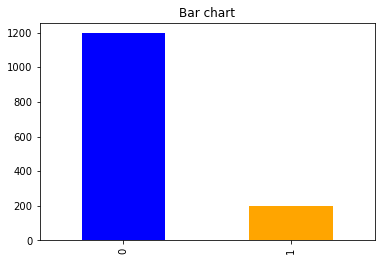

In [20]:
import matplotlib.pyplot as plt
count_Class=pd.value_counts(y_test, sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

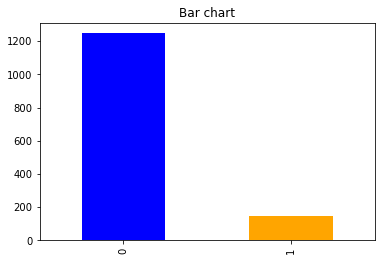

In [21]:
count_Class1=pd.value_counts(pred, sort= True)
count_Class1.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()